Import necessary libraries

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

 Step 1: Load Dataset

In [9]:
df = pd.read_csv("iris.csv")   # Ensure your file is in the same directory
print("Dataset Shape:", df.shape)
print(df.head())

Dataset Shape: (150, 5)
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


Convert all column names to lowercase for consistency

In [10]:
df.columns = df.columns.str.strip().str.lower()

Step 2: Encode Target Column

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Accuracy: 1.0


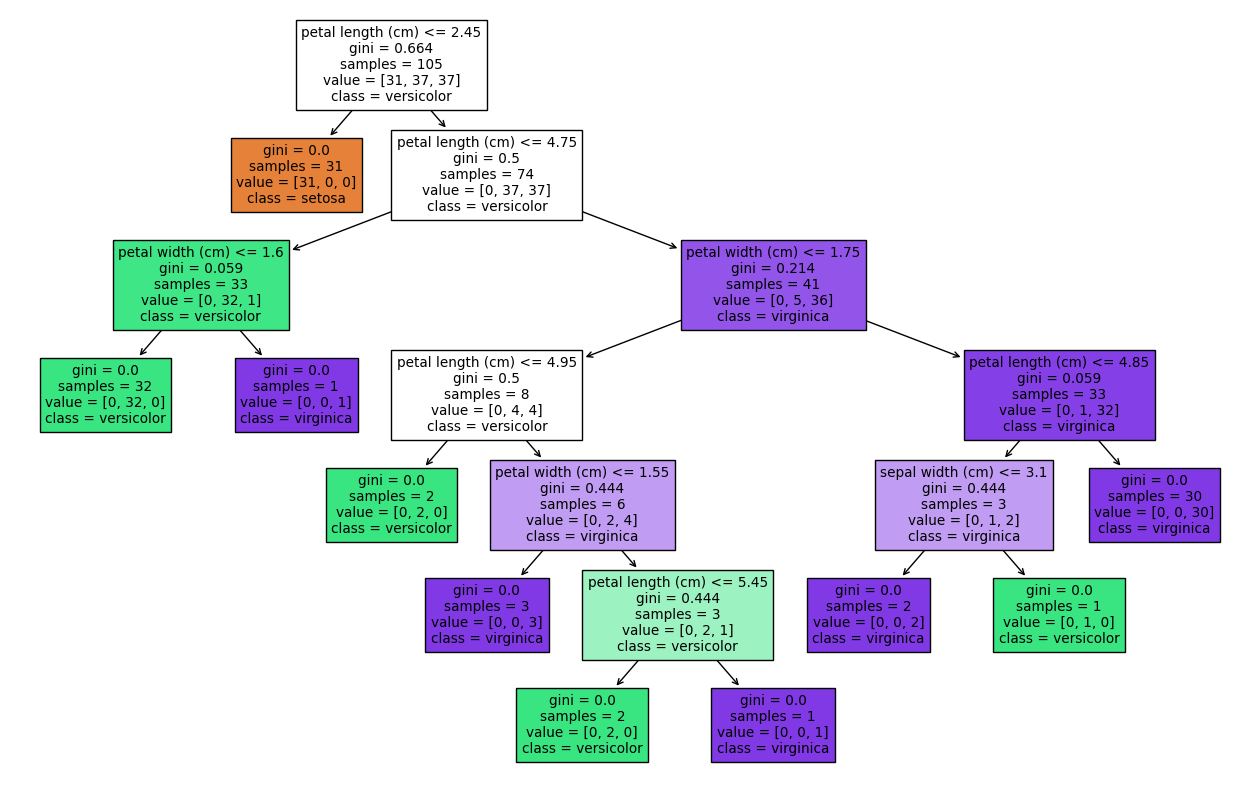

In [12]:
# Import libraries
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Load the iris dataset
iris = load_iris()

# Convert to DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

# Optional: decode numeric target to names
df['species'] = [iris.target_names[i] for i in df['species']]

# Encode target labels to numeric
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])

# Define feature matrix (X) and target vector (y)
X = df.drop('species', axis=1)
y = df['species']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Evaluate model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Plot Decision Tree
plt.figure(figsize=(16,10))
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()


Step 3: Split Data into Features and Labels

In [14]:
# Define features (X) and target (y)
X = df.drop('species', axis=1)   # not 'class'
y = df['species']

# Split data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Step 4: Initialize Models

In [15]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}

Step 5: Train and Evaluate Models

In [16]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec
    })

    print(f"\nModel: {name}")
    print(classification_report(y_test, y_pred, zero_division=0))


Model: Logistic Regression
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Model: Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Model: Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
   

Step 6: Display Results

In [17]:
results_df = pd.DataFrame(results)
print("\nComparison of Classification Algorithms:\n")
print(results_df)


Comparison of Classification Algorithms:

                 Model  Accuracy  Precision  Recall
0  Logistic Regression       1.0        1.0     1.0
1        Decision Tree       1.0        1.0     1.0
2        Random Forest       1.0        1.0     1.0
3                  SVM       1.0        1.0     1.0
4                  KNN       1.0        1.0     1.0


Step 7: Visualization

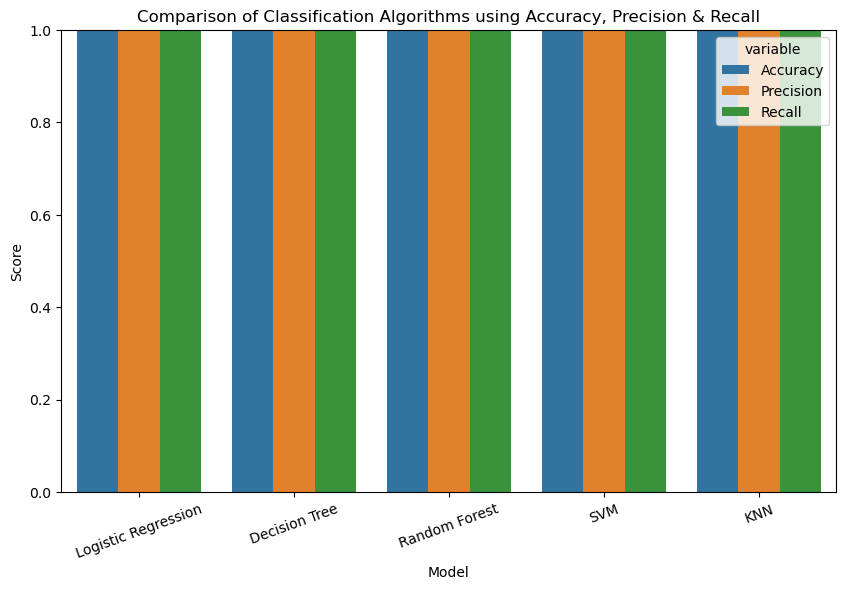

In [18]:
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df.melt(id_vars="Model"), x="Model", y="value", hue="variable")
plt.title("Comparison of Classification Algorithms using Accuracy, Precision & Recall")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=20)
plt.show()